In [ ]:
from importlib import reload

import jax_L96 as jl
from jax_L96 import jax, jnp
import numpy as np
from matplotlib import pyplot as plt

reload(jl)

<module 'jax_L96' from '/home/schilln/documents/research-data-assimilation/jax_L96.py'>

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = jnp.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

system = jl.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = jl.RK4(system)

In [ ]:
# Initial true state
seed = 42
key = jax.random.key(seed)
init = jax.random.uniform(key, I + I * J)
# To be able to compare with NumPy previous work:
init = np.random.default_rng(42).uniform(size=I + I * J)

u0 = jnp.array(init[:I])
v0 = jnp.array(jnp.reshape(init[I:], (I, J)))

# Initial simulation state
u0_sim = jnp.zeros_like(u0)
v0_sim = jnp.zeros_like(v0)

t0, tf = 0, 120
dt = 0.025

with jax.log_compiles(True):
    U, V = solver.solve(
        system,
        u0,
        v0,
        t0,
        tf,
        dt,
    )
    U.block_until_ready()

    # Nudged solution
    Un, Vn = solver.solve(
        system,
        u0_sim,
        v0_sim,
        t0,
        tf,
        dt,
        U,
    )
    Un.block_until_ready()

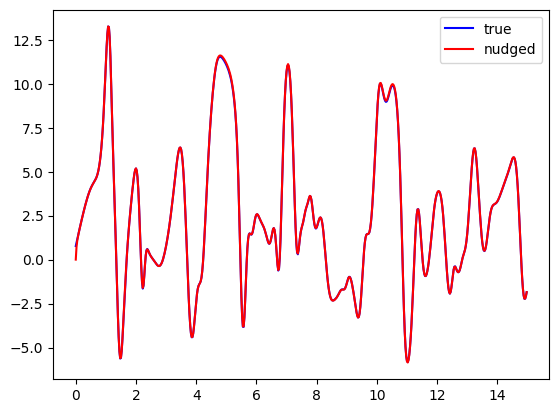

In [ ]:
tls = np.arange(t0, tf, dt)

k = 0
s = jnp.s_[k * 600 : (k + 1) * 600]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], U[s, i], label="true", color="blue")
ax.plot(tls[s], Un[s, i], label="nudged", color="red")

ax.legend()
plt.show()

# NumPy

In [ ]:
import np_L96 as nl

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = np.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 50

system = nl.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)

In [ ]:
# Initial true state
seed = 42
key = jax.random.key(seed)
init = jax.random.uniform(key, I + I * J)
# To be able to compare with NumPy previous work:
init = np.random.default_rng(42).uniform(size=I + I * J)

u0 = jnp.array(init[:I])
v0 = jnp.array(jnp.reshape(init[I:], (I, J)))

# Initial simulation state
U0_sim = jnp.zeros_like(u0)
V0_sim = jnp.zeros_like(v0)

t0, tf = 0, 120
dt = 0.01

U, V = nl.rk4(
    system,
    u0,
    v0,
    t0,
    tf,
    dt,
)

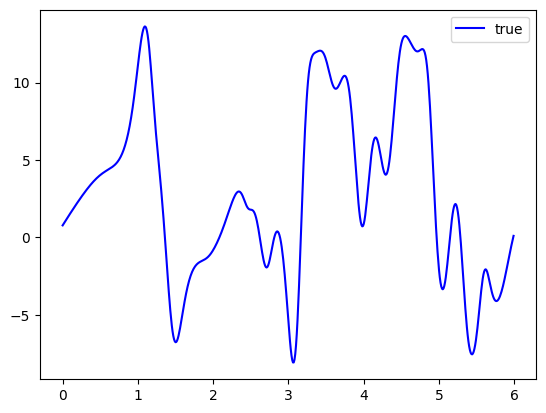

In [ ]:
tls = np.arange(t0, tf, dt)

s = jnp.s_[:600]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], U[s, i], label="true", color="blue")

ax.legend()
plt.show()